Frequentist 95% CI: [9.90, 27.22]
Bayesian 95% Credible Interval: [10.67, 27.22]


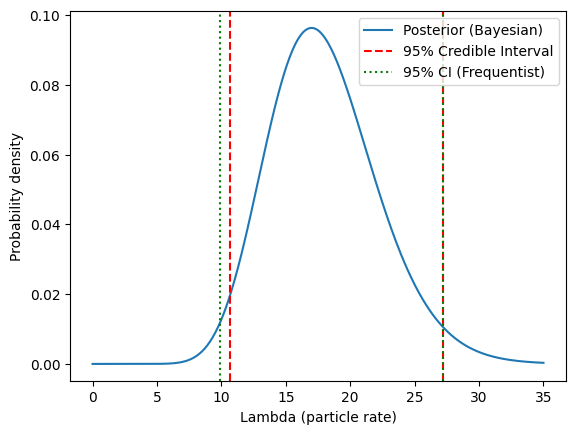

In [3]:
import numpy as np
from scipy.stats import chi2, gamma
import matplotlib.pyplot as plt

# Observed data
n_obs = 17
alpha = 0.05

# -------------------------------
# Frequentist 95% Confidence Interval
# -------------------------------
ci_lower = 0.5 * chi2.ppf(alpha/2, 2*n_obs)
ci_upper = 0.5 * chi2.ppf(1-alpha/2, 2*(n_obs+1))
print(f"Frequentist 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# -------------------------------
# Bayesian 95% Credible Interval
# -------------------------------
# Posterior is Gamma(n+1, 1)
posterior = gamma(a=n_obs+1, scale=1.0)
bayes_lower = posterior.ppf(alpha/2)
bayes_upper = posterior.ppf(1-alpha/2)
print(f"Bayesian 95% Credible Interval: [{bayes_lower:.2f}, {bayes_upper:.2f}]")

# -------------------------------
# Plotting the posterior
# -------------------------------
lambda_vals = np.linspace(0, 35, 500)
posterior_pdf = posterior.pdf(lambda_vals)

plt.plot(lambda_vals, posterior_pdf, label='Posterior (Bayesian)')
plt.axvline(bayes_lower, color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(bayes_upper, color='red', linestyle='--')
plt.axvline(ci_lower, color='green', linestyle=':', label='95% CI (Frequentist)')
plt.axvline(ci_upper, color='green', linestyle=':')
plt.xlabel('Lambda (particle rate)')
plt.ylabel('Probability density')
plt.legend()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, gamma
import ipywidgets as widgets
from IPython.display import display

alpha = 0.05  # 95% interval

def plot_intervals(n_obs):
    # Frequentist 95% Confidence Interval
    ci_lower = 0.5 * chi2.ppf(alpha/2, 2*n_obs)
    ci_upper = 0.5 * chi2.ppf(1-alpha/2, 2*(n_obs+1))

    # Bayesian 95% Credible Interval (flat prior)
    posterior = gamma(a=n_obs+1, scale=1.0)
    bayes_lower = posterior.ppf(alpha/2)
    bayes_upper = posterior.ppf(1-alpha/2)

    print(f"Observed counts: {n_obs}")
    print(f"Frequentist 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Bayesian 95% Credible Interval: [{bayes_lower:.2f}, {bayes_upper:.2f}]")

    # Plot posterior
    lambda_vals = np.linspace(0, max(ci_upper, bayes_upper)+5, 500)
    posterior_pdf = posterior.pdf(lambda_vals)

    plt.figure(figsize=(10,5))
    plt.plot(lambda_vals, posterior_pdf, label='Posterior (Bayesian)')

    # Bayesian CI
    plt.axvline(bayes_lower, color='red', linestyle='--', label='Bayesian 95% CI')
    plt.axvline(bayes_upper, color='red', linestyle='--')

    # Frequentist CI
    plt.axvline(ci_lower, color='green', linestyle=':', label='Frequentist 95% CI')
    plt.axvline(ci_upper, color='green', linestyle=':')

    plt.xlabel('Lambda (particle rate)')
    plt.ylabel('Probability density')
    plt.title(f'CI vs Credible Interval for n={n_obs} observed events')
    plt.legend()
    plt.show()

# Interactive slider
n_slider = widgets.IntSlider(value=17, min=0, max=50, step=1, description='Observed n:')
widgets.interact(plot_intervals, n_obs=n_slider)

interactive(children=(IntSlider(value=17, description='Observed n:', max=50), Output()), _dom_classes=('widget…

<function __main__.plot_intervals(n_obs)>